# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
data_path = r"C:\Users\chere\OneDrive\Desktop\IPLDEAE\eae_ipld_project\data\netflix_titles.csv"

movies_df = pd.read_csv(data_path)

movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [134]:
min_year = movies_df['release_year'].min()
max_year = movies_df['release_year'].max()

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [135]:
num_missing_directors = len(movies_df[pd.isna(movies_df['director'])]['show_id'].unique().tolist())

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [136]:
movies_df['country'] = movies_df['country'].fillna('Unknown')
countries = []
for i in movies_df['country'].unique().tolist():
    count = i.split(',')
    for c in count:
        if (c.strip() not in countries) & (c.strip() != 'Unknown') & (c.strip() != ''):
            countries.append(c.strip())

n_countries = len(countries)

print(f"There are {n_countries} different countries in the data")

There are 122 different countries in the data


In [137]:
movies_df['title char count'] = movies_df['title'].apply(lambda x: len(x) if pd.notna(x) else None)

avg_title_length = movies_df['title char count'].mean()

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.725899852390143 characters


       country_list  show_id
27    United States       36
17            India       20
11    United States        7
5           Germany        6
10   United Kingdom        6
26   United Kingdom        5
2    Czech Republic        3
25           Turkey        3
7             Japan        3
1            Canada        2


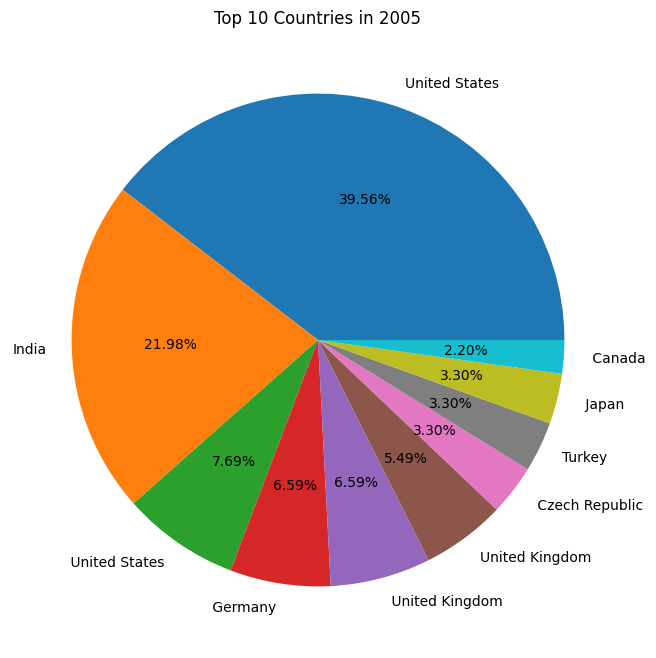

In [138]:
year = 2005

movies_df['country_list'] = movies_df['country'].apply(lambda x: [i for i in x.split(',') if i])

modified_df = movies_df[(movies_df['release_year'] == year) & (movies_df['country'] != 'Unknown')].explode('country_list')

modified_df = modified_df.groupby(by = 'country_list')['show_id'].nunique().reset_index().sort_values(by = 'show_id', ascending = False)

top_10_countries = modified_df[['country_list', 'show_id']].iloc[:10]

print(top_10_countries)

fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries['show_id'], labels=top_10_countries['country_list'], autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


C:\Users\chere\AppData\Local\Temp\ipykernel_21576\234698793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_length['duration'] = movie_length['duration'].apply(lambda x: int(x.strip().split(' ')[0]))


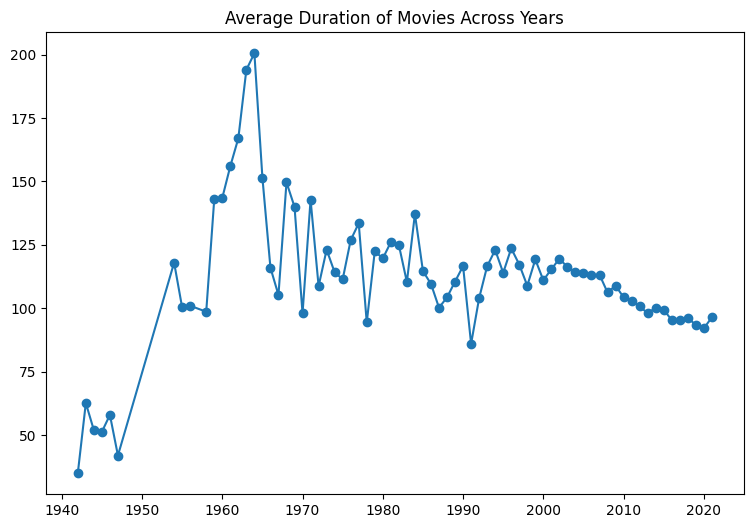

In [139]:
movie_length = movies_df[movies_df['type'] == 'Movie']
movie_length['duration'] = movie_length['duration'].apply(lambda x: int(x.strip().split(' ')[0]))
movies_avg_duration_per_year = movie_length.groupby(by = 'release_year')['duration'].mean().reset_index()

fig = plt.figure(figsize=(9, 6))

plt.plot(movies_avg_duration_per_year['release_year'], movies_avg_duration_per_year['duration'], marker = 'o')

plt.title("Average Duration of Movies Across Years")

plt.show()